In [2]:
import geopandas as gpd
import geodatasets as gds
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# set random RGB color for the parcels
import random
def random_hex_color():
  r = random.randint(0, 255)
  g = random.randint(0, 255)
  b = random.randint(0, 255)
  return "#{:02x}{:02x}{:02x}".format(r, g, b)
random_hex_color()
df_parcels['color'] = [ random_hex_color() for i in range(len(df_parcels)) ]

In [13]:
# create new data column to make index accessible
df_parcels['rowIndex'] = df_parcels.index*np.random.rand(len(df_parcels))

<Axes: >

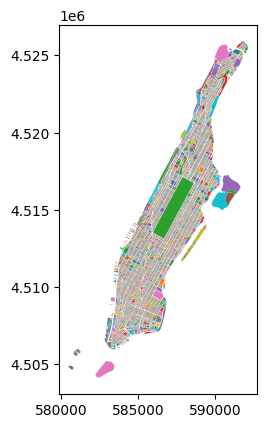

In [12]:
df_parcels.plot(column="color")

In [ ]:
# set CRS to web mercator
df_parcels = df_parcels.to_crs(epsg=3857)
df_buildings = df_buildings.to_crs(epsg=3857)

In [ ]:
# set lat long (NYC/Manhattan) and scan range
lat_lng = [40.75363483074498, -73.98361503402344] 
delta = 0.05
tl = [lat_lng[0]+delta, lat_lng[1]-delta]
br = [lat_lng[0]-delta, lat_lng[1]+delta]
z = 15 # Set the resolution (max at 15)

In [ ]:
# set parcel boundary
parcelbounds = df_parcels.loc[[21789],'geometry'].total_bounds
minx, miny, maxx, maxy = parcelbounds
average_x = (minx + maxx) / 2
average_y = (miny + maxy) / 2

In [ ]:
# zoom to parcel
df_parcels['rowIndex'] = df_parcels.index*np.random.rand(len(df_parcels))
f, ax = plt.subplots(figsize=(9, 9), dpi=250)
df_parcels.plot(ax=ax, column="color", alpha=1)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, attribution_size=1)
ax.set_xlim(minx-75, maxx+75)
ax.set_ylim(miny-75, maxy+75)
ax.set_axis_off()

In [ ]:
# add buildings
f, ax = plt.subplots(figsize=(9, 9), dpi=100)
df_parcels.plot(ax=ax, column='color', alpha=1)
df_buildings.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5, alpha=1)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, attribution_size=1)
ax.set_xlim(minx-75, maxx+75)
ax.set_ylim(miny-75, maxy+75)
ax.set_axis_off()

In [3]:
df_parcels = gpd.read_file("/Users/ls/Dropbox (MIT)/02 Work/LCAU:SERC/Million Neighborhoods:DP/Data/Parcels/NYC_2021_Tax_Parcels_SHP_2203/NewYork_2021_Tax_Parcels_SHP_2203.shp")
df_buildings = gpd.read_file("/Users/ls/Dropbox (MIT)/02 Work/LCAU:SERC/Million Neighborhoods:DP/Data/Building Footprints/NYC/geo_export_a80ea1a2-e8e0-4ffd-862c-1199433ac303.shp")

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import MapboxTiles
import geopandas as gpd

def map_maker(df_parcels, df_buildings, scale=10):
    # tiler = Stamen('terrain-background')
    access_token = "your-token"
    tiler = MapboxTiles(access_token, 'satellite-v9')
    df_parcels = df_parcels.to_crs(epsg=3857)
    df_buildings = df_buildings.to_crs(epsg=3857)
    crs_epsg = ccrs.epsg("3857")

    mercator = tiler.crs

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=mercator)
    # change figure size of the subplot
    fig.set_size_inches(18.5, 10.5)

    bounds = df_parcels.total_bounds
    ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], crs=ccrs.epsg("3857"))
    # loop through the parcels and plot them
    for row in df_parcels.itertuples():
        # df_parcels.iloc[i:i+1].plot(color=df_parcels.iloc[i:i+1].color.values[0])
        geometry = row.geometry
        color = row.color
        ax.add_geometries(geometry, crs = crs_epsg, facecolor=color) # for Lat/Lon data.

    ax.add_geometries(df_buildings.geometry, crs = crs_epsg, facecolor='black', edgecolor='white', linewidth=1.5, alpha=1)

    # add the mabox tiles to the axis at zoom level 10 (mapbox has 23 zoom levels)
    ax.add_image(tiler, scale)

    # ax.coastlines('10m')
    plt.show()

In [7]:
def subset(df, index):
    # selected_feature = df.iloc[index]
    # queried_feature = df.query('selected_feature == 20')

    proximity = 75 # Set the proximity (in meters) to filter the DataFrame
    minx, miny, maxx, maxy = df.loc[[np.random.randint(0, df.shape[0])], 'geometry'].total_bounds

    # Filter the DataFrame to include only rows within the proximity
    filtered_df = df.cx[minx - proximity: maxx + proximity, miny - proximity: maxy + proximity]
    
    return filtered_df

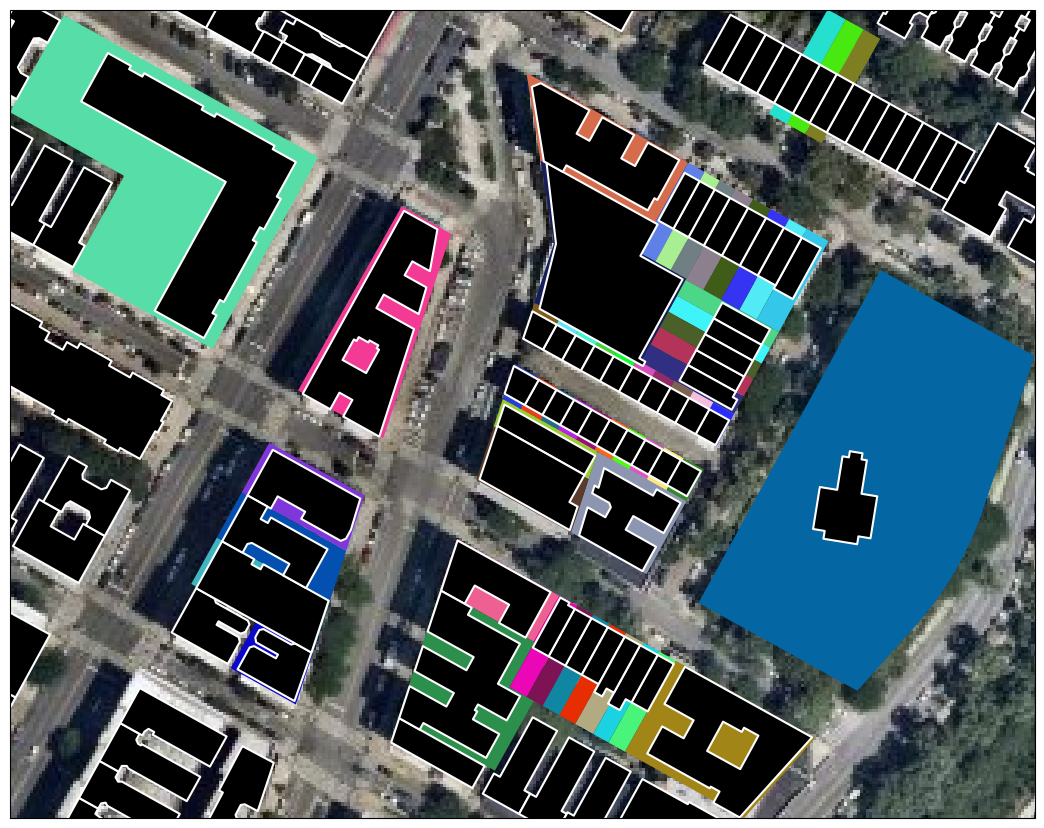

In [22]:
map_maker(subset(df_parcels, 0), subset(df_buildings, 0), 16)